<a href="https://colab.research.google.com/github/Hentonybarboza/MNIST/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -U scikit-learn
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


##Importando os dados

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)


In [4]:
x, y = mnist["data"], mnist["target"]
x.shape
y.shape

(70000,)

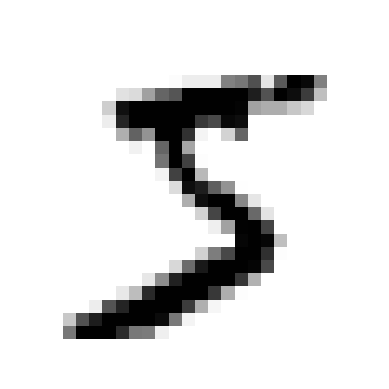

'5'

In [25]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = x[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()
y[0]

In [7]:
#misturando os dados de treino para garantir que todas  validações cruzadas sejam similares,
#e garantir que o modelo não tenha muiutos dados iguais em sequencia

x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

##Treinando o modelo

In [26]:
#Vamos começar simplificando o modelo para identificar apenas um tipo de número, um classificador binário
y_train = y_train.astype(int) #Por algum motivo os labels de y estavam como strings, por isso converti
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
 #Vamos pegar somente os dados marcados como 5 no nosso dataset
y_train_5
print(type(y_train))
print(y_train.dtype)
print(y_train[:50])
print(y_train_5[:50])

<class 'numpy.ndarray'>
int64
[6 6 3 9 1 4 1 6 7 1 7 2 8 3 1 9 3 5 5 3 7 7 5 7 5 2 3 6 5 1 9 3 1 1 8 0 3
 7 7 9 3 8 6 0 9 7 4 6 3 2]
[False False False False False False False False False False False False
 False False False False False  True  True False False False  True False
  True False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False]


In [27]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(x_train, y_train_5)

SGDClassifier(random_state=42)

In [24]:
sgd_clf.predict([some_digit])

array([ True])